# Homework 2
# Snow Hydrology
### Clinton Alden

In [1]:
!pip install netcdf4
!pip install xarray

In [7]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# read in SoS obs
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)
sos_dataset_daily = sos_dataset.resample(time="1440Min").mean()

# read in precip data
kettle_ponds_precip = pd.read_csv('../data/kettle_ponds_precip.csv')

In [4]:
precip_file = "../data/kettle_ponds_precip.csv"
precip_dataset = pd.read_csv(precip_file)
precip_dataset['date'] = pd.to_datetime(precip_dataset['date'])
precip_dataset = precip_dataset.set_index('date').to_xarray()

In [29]:
df_butte = pd.read_csv('./butte_snotel.csv')
df_butte['datetime'] = pd.to_datetime(df_butte['datetime'])
df_butte.set_index('datetime', inplace=True)
df_butte['PRECIPITATION'] = df_butte['PRECIPITATION']*10
df_butte['SWE'] = df_butte['SWE']*10

In [30]:
df_scofield = pd.read_csv('./schofield_snotel.csv')
df_scofield['datetime'] = pd.to_datetime(df_scofield['datetime'])
df_scofield.set_index('datetime', inplace=True)
df_scofield['PRECIPITATION'] = df_scofield['PRECIPITATION']*10
df_scofield['SWE'] = df_scofield['SWE']*10

### Problem 1

#### Using the observations of precipitation and the snow pillow data at Kettle Ponds and the two SNOTEL stations (see Module 2 labs), we are going to investigate the mass balance and snow accumulation at sites in the East River Valley.

#### A. Plot timeseries of snow water equivalent from the four snow pillows at Kettle Ponds. Plot a separate time series of cumulative precipitation at Kettle Ponds. Add to your two plots the SWE and precipitation data from two Snotel Stations located nearby.

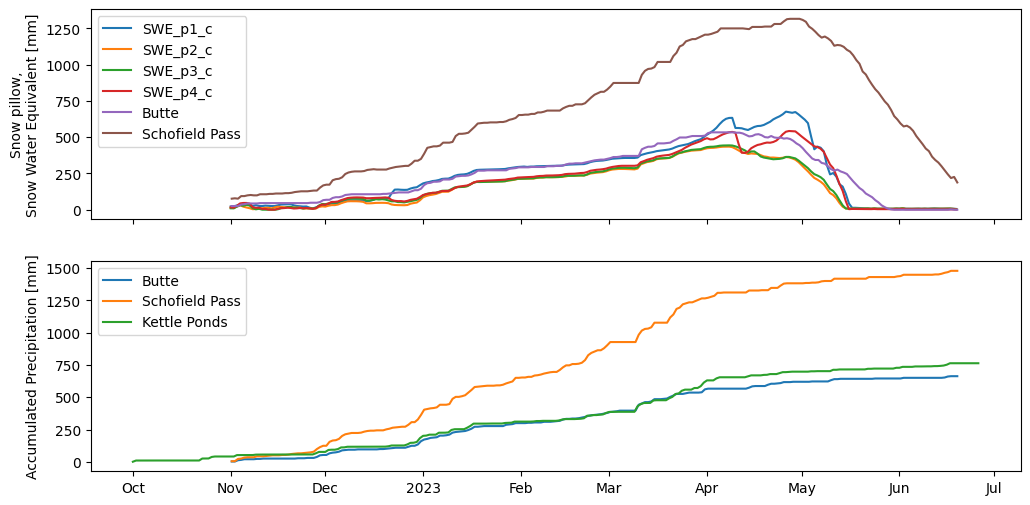

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(12,6), sharex=True)
sos_dataset_daily['SWE_p1_c'].plot(ax=axes[0], label='SWE_p1_c')
sos_dataset_daily['SWE_p2_c'].plot(ax=axes[0], label='SWE_p2_c')
sos_dataset_daily['SWE_p3_c'].plot(ax=axes[0], label='SWE_p3_c')
sos_dataset_daily['SWE_p4_c'].plot(ax=axes[0], label='SWE_p4_c')
axes[0].plot(df_butte.index, df_butte['SWE'], label='Butte')
axes[0].plot(df_scofield.index, df_scofield['SWE'], label='Schofield Pass')

axes[1].plot(df_butte.index, df_butte['PRECIPITATION'].cumsum(), label='Butte')
axes[1].plot(df_scofield.index, df_scofield['PRECIPITATION'].cumsum(), label='Schofield Pass')
precip_dataset['acc_prec'].plot(ax=axes[1], label='Kettle Ponds')

axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("Snow pillow,\nSnow Water Equivalent [mm]")
axes[1].set_ylabel("Accumulated Precipitation [mm]")
# axes[0].set_xlim(dt.datetime(2022,11,1), dt.datetime(2023,3,27))
plt.show()

#### B. Calculate the seasonal maximum SWE from one of the Kettle Ponds (not Snotel) snow pillows. Calculate the cumulative precipitation up until the date of your identified maximum SWE. Calculate the percentage of the cumulative precipitation accounted for by the max SWE value.

In [ ]:
kp_max_swe = sos_dataset_daily['SWE_p3_c'].max()
kp_max_swe_date = sos_dataset_daily['SWE_p3_c'].idxmax()
kp_precip_max_swe = precip_dataset.loc[kp_max_swe_date, 'acc_prec']
kp_max_swe_date

#### C. Write out the snow mass balance equation from lecture. Given your calculations for part B, what terms in the mass balance do you think are most likely to account for the disparity between cumulative precipitation and maximum SWE? How certain do you think our estimates of cumulative precipitation and maximum SWE are?

#### D. Discuss which factors of the mass balance are most likely to vary spatially. Reference your plots from A. Is there more variability between sites further away? Or are the four snow pillows at Kettle Ponds as different as the two SNOTEL sites from elsewhere in the watershed?

#### E. Summer researchers at the Rocky Mountain National Biological Lab in the Upper East River Valley want to start their research as soon as possible. To access the lab, they need to drive down a forest service road that is currently snowed in. The forest service opens the road when the snow melts and disappears. Using the long term records at the SNOTEL sites, and (optionally) any other information you like, predict when the snow will be gone (and the road clear) in 2025.

#### F. Following lab 2-3, calculate snow density at one Kettle Ponds tower using 30-minute data (i.e. mimic what we did in lab 2-3, but do not resample the data to daily time steps). For the time period January 1-15, 2023, plot snow density and snow depth. Explain what patterns you see in the two time series.

#### In snow models, a simple exponential decay equation is used to predict the compaction of snow over time (e.g. Essery et al., 2013, https://www.sciencedirect.com/science/article/abs/pii/S0309170812002011). Such a model takes the form:

density(t) = max_density + (initial_density - max_density)*e^(-t / tau_p)

#### where max_density is a constant, the maximum possible snow density (e.g. 300-400 kg/m^3), initial_density is the starting density of the snowpack, and tau_p is a decay constant, e.g. 180,000 seconds. Identify a short time period between January 1–15 during which you observe a single instant of decaying density/snow depth (should be between 24 and 72 hours long). Apply this equation to the short time series of snow density. Plot the observed density and the predicted density time series, and tweak the parameters until your model has a decent fit for your selected event.

### Problem 2

On your reading of Lundquist et al. 2024 "Sublimation of Snow"".

In Figure 3B, SWE measured on four different snow pillows show significant and diverging change on the morning of December 22. What caused the SWE signals to diverge? Based on this answer, what do you think is a shortcoming of SNOTEL measurement sites? Describe the ideal area for a SNOTEL site (think about topography, weather/wind conditions). Maximum 8 sentences.